# The Sparks Foundation (Data Science & Business Analytics Task)
# Task 4
# Exploratory Data Analysis - Terrorism

Task 4 : As a security/defense Analyst, try to find out the hot zone of terrorism. What all security issues and insights you can derive by EDA?

<h3>Created By :- Kshitij Barnwal</h3>

# Step 1: Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

# Step 2 : Importing the Dataset

In [2]:
terrorism = pd.read_csv("C:/Users/kshit/Dropbox/My PC (Kshitij-PC)/Downloads/Global Terrorism - START data/globalterrorismdb_0718dist.csv", encoding = "latin1")
terrorism.head(10)

C:\Users\kshit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [3]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
terrorism.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [5]:
terrorism.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
terrorism.shape

(181691, 135)

In [7]:
terrorism.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
terrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

terrorism = terrorism[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [9]:
terrorism.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
terrorism['Wound'] = terrorism['Wound'].fillna(0)
terrorism['kill'] = terrorism['kill'].fillna(0)
terrorism['Casualty'] = terrorism['Wound'] + terrorism['kill']

In [11]:
terrorism['Casualty'].head(10)

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Casualty, dtype: float64

# Data Visualization

#### Bar plot of Attacks in different years vs count of attacks per year

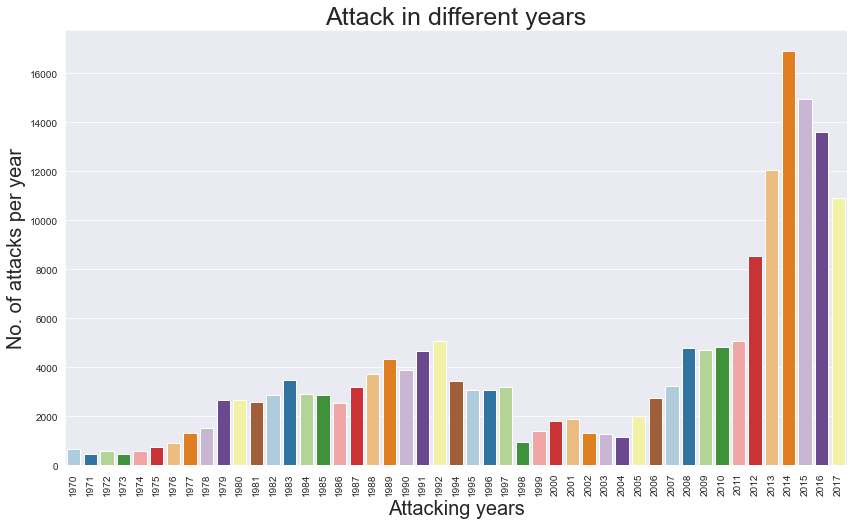

In [12]:
year = terrorism['Year'].unique()
years_count = terrorism['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize=(14,8))
sns.barplot(x = year, y = years_count, palette = 'Paired')
plt.xticks(rotation = 90)
plt.title('Attack in different years', fontsize=25)
plt.xlabel('Attacking years', fontsize=20)
plt.ylabel('No. of attacks per year', fontsize=20)
plt.show()

#### Cross tab of terrorism in different regions

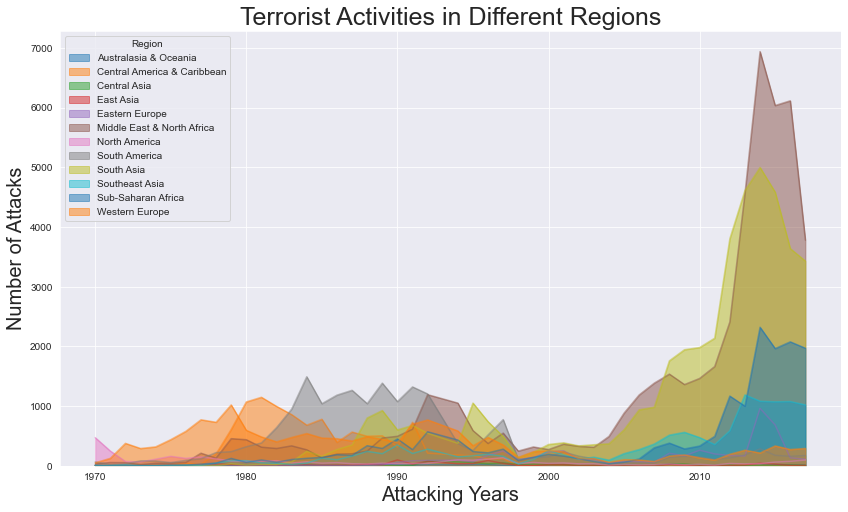

In [13]:
pd.crosstab(terrorism.Year , terrorism.Region).plot(kind = 'area' , stacked = False , figsize = (14,8))
plt.title('Terrorist Activities in Different Regions',fontsize = 25)
plt.xlabel('Attacking Years',fontsize = 20)
plt.ylabel('Number of Attacks',fontsize = 20)
plt.show()

#### Bar Plot Countries vs No. of Attacks

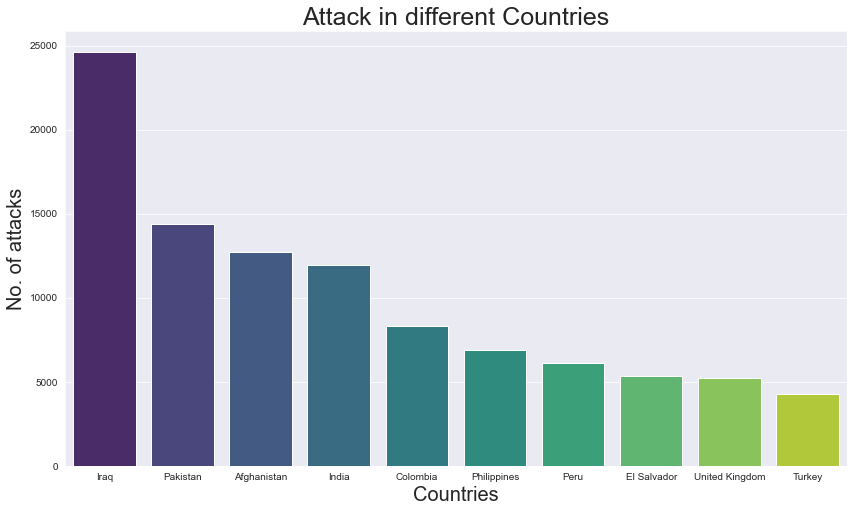

In [14]:
countries = terrorism['Country'].value_counts()[0:10].index
attacks = terrorism['Country'].value_counts()[0:10].values
plt.figure(figsize=(14, 8))
sns.barplot(x = countries, y = attacks, palette = 'viridis')
plt.title('Attack in different Countries', fontsize=25)
plt.xlabel('Countries', fontsize=20)
plt.ylabel('No. of attacks', fontsize=20)
plt.show()

#### Bar Plot Groups vs No. of Attacks

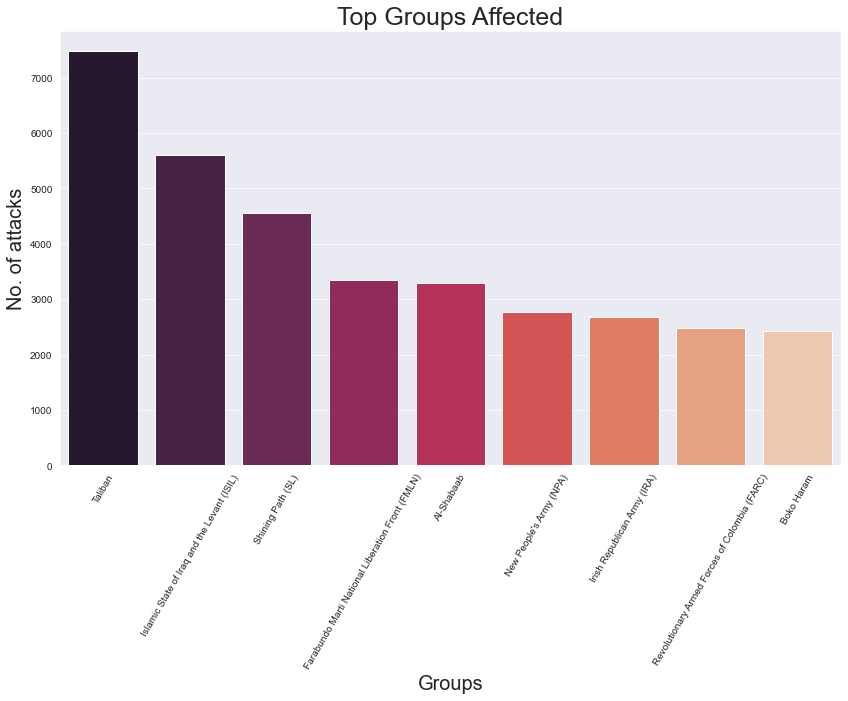

In [15]:
groups = terrorism['Group'].value_counts()[0:10].drop('Unknown').index
attacks_groups = terrorism['Group'].value_counts()[0:10].drop('Unknown').values
plt.figure(figsize=(14, 8))
sns.barplot(x = groups, y = attacks_groups, palette = 'rocket')
plt.xticks(rotation = 60)
plt.title('Top Groups Affected', fontsize=25)
plt.xlabel('Groups', fontsize=20)
plt.ylabel('No. of attacks', fontsize=20)
plt.show()

#### Bar Plot Cities vs No. of Attacks

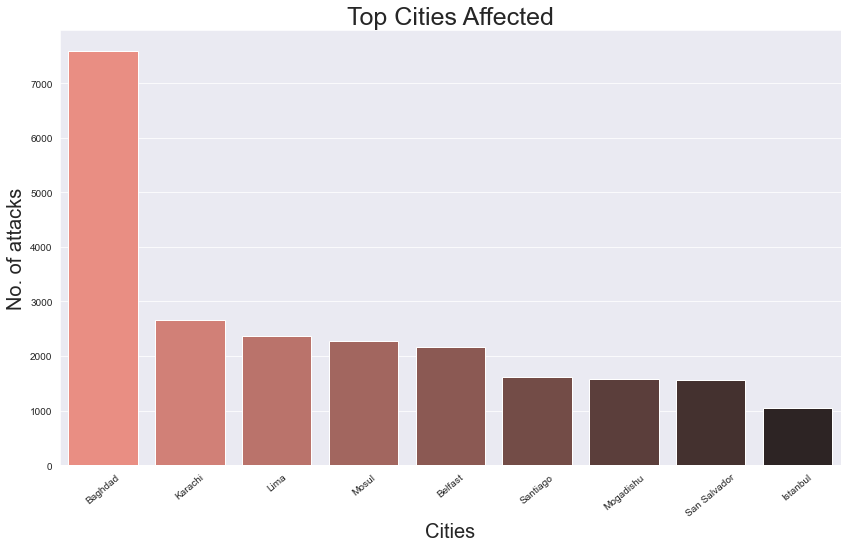

In [16]:
cities = terrorism['City'].value_counts()[0:10].drop('Unknown').index
attacks_cities = terrorism['City'].value_counts()[0:10].drop('Unknown').values
plt.figure(figsize=(14, 8))
sns.barplot(x = cities, y = attacks_cities, palette = 'dark:salmon_r')
plt.xticks(rotation = 40)
plt.title('Top Cities Affected', fontsize=25)
plt.xlabel('Cities', fontsize=20)
plt.ylabel('No. of attacks', fontsize=20)
plt.show()

#### Bar Plot AttackType used vs No. of Attacks

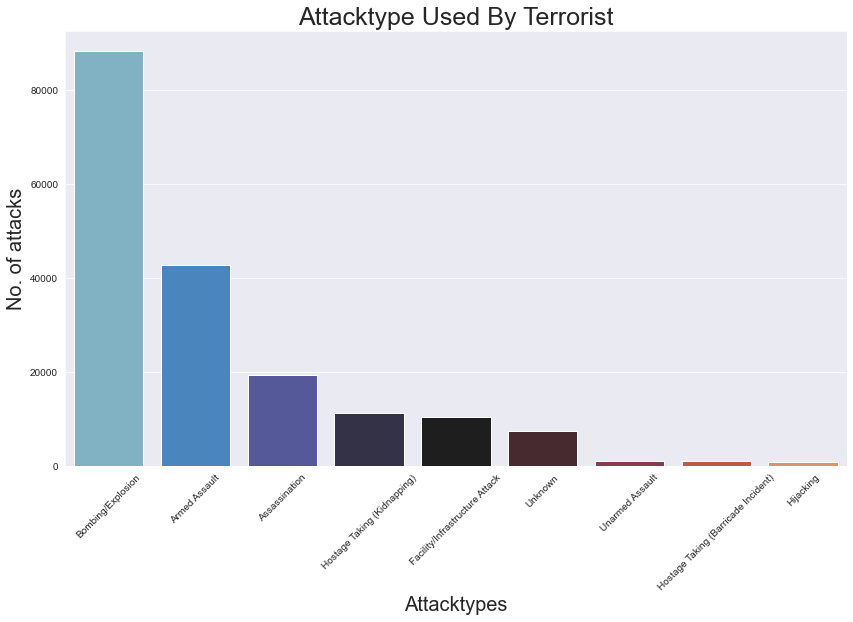

In [17]:
attacktypes = terrorism['Attacktype'].value_counts()[0:10].index
attacks_types = terrorism['Attacktype'].value_counts()[0:10].values
plt.figure(figsize=(14, 8))
sns.barplot(x = attacktypes, y = attacks_types, palette = 'icefire')
plt.xticks(rotation = 45)
plt.title('Attacktype Used By Terrorist', fontsize=25)
plt.xlabel('Attacktypes', fontsize=20)
plt.ylabel('No. of attacks', fontsize=20)
plt.show()

#### Bar Plot TargetType vs No. of Attacks

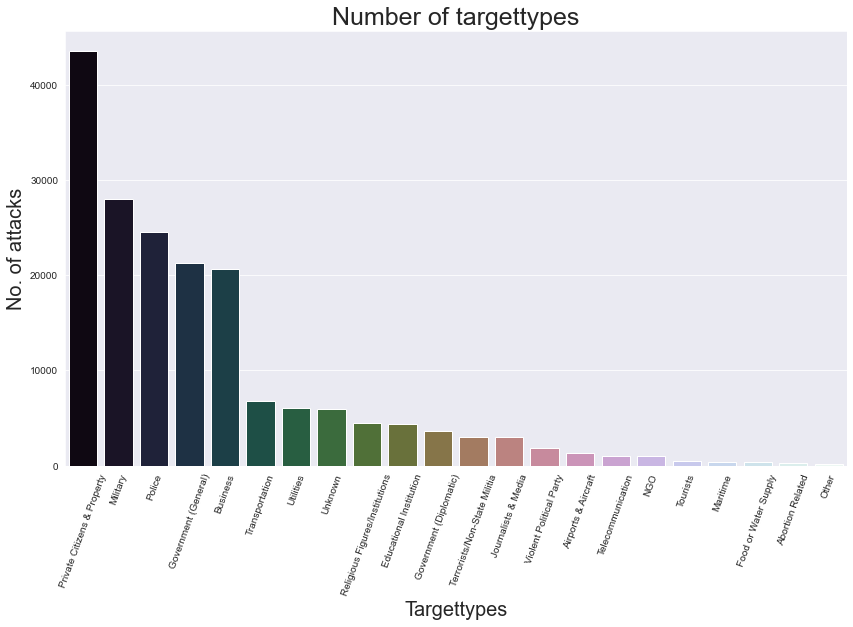

In [18]:
targettypes = terrorism['Targettype'].value_counts().index
attacks_target = terrorism['Targettype'].value_counts().values
plt.figure(figsize=(14, 8))
sns.barplot(x = targettypes, y = attacks_target, palette = 'cubehelix')
plt.xticks(rotation = 70)
plt.title('Number of targettypes', fontsize=25)
plt.xlabel('Targettypes', fontsize=20)
plt.ylabel('No. of attacks', fontsize=20)
plt.show()

#### Bar Plot of Attacktypes v No of people killed

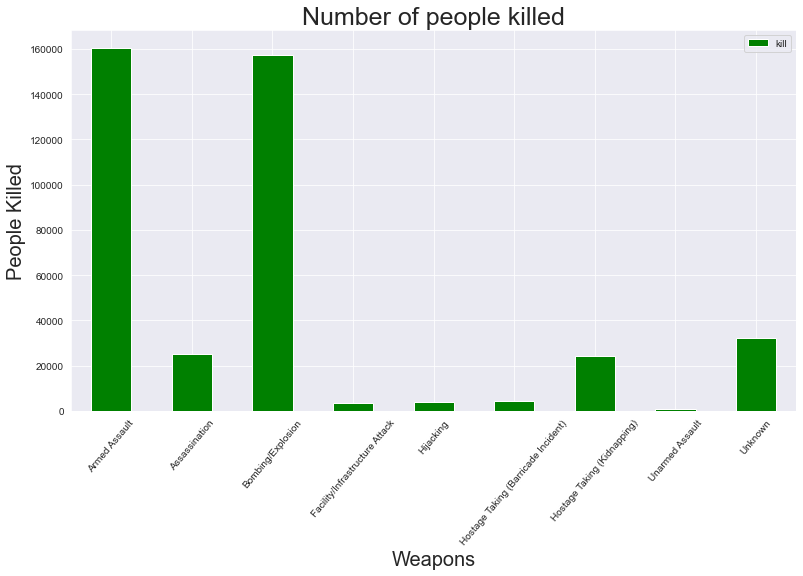

In [19]:
terrorism[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(13,7),color=['green'])
plt.xticks(rotation=50)
plt.title('Number of people killed',fontsize = 25)
plt.xlabel('Weapons',fontsize = 20)
plt.ylabel('People Killed',fontsize=20)
plt.show()

#### Bar Plot of Attacktypes v No of people wounded

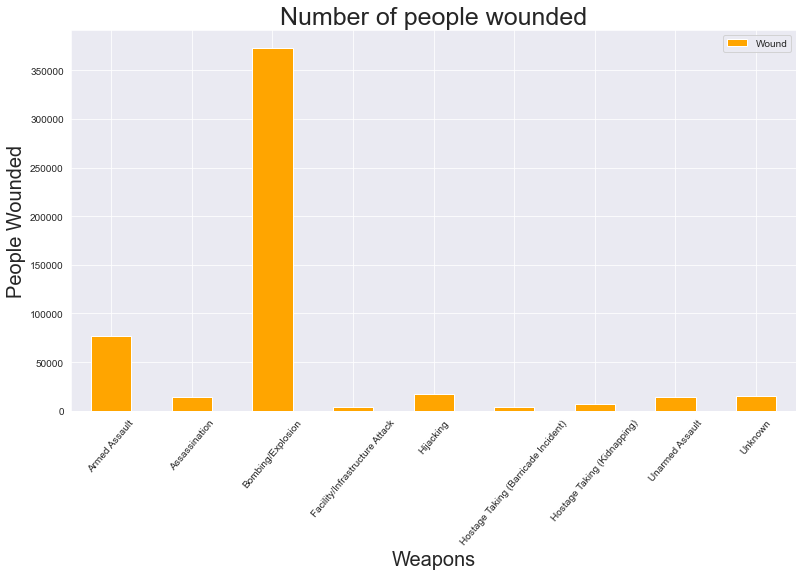

In [20]:
terrorism[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(13,7),color=['orange'])
plt.xticks(rotation=50)
plt.title('Number of people wounded',fontsize = 25)
plt.xlabel('Weapons',fontsize = 20)
plt.ylabel('People Wounded',fontsize=20)
plt.show()

#### Bar Plot of Terrorists Group v No of people killed

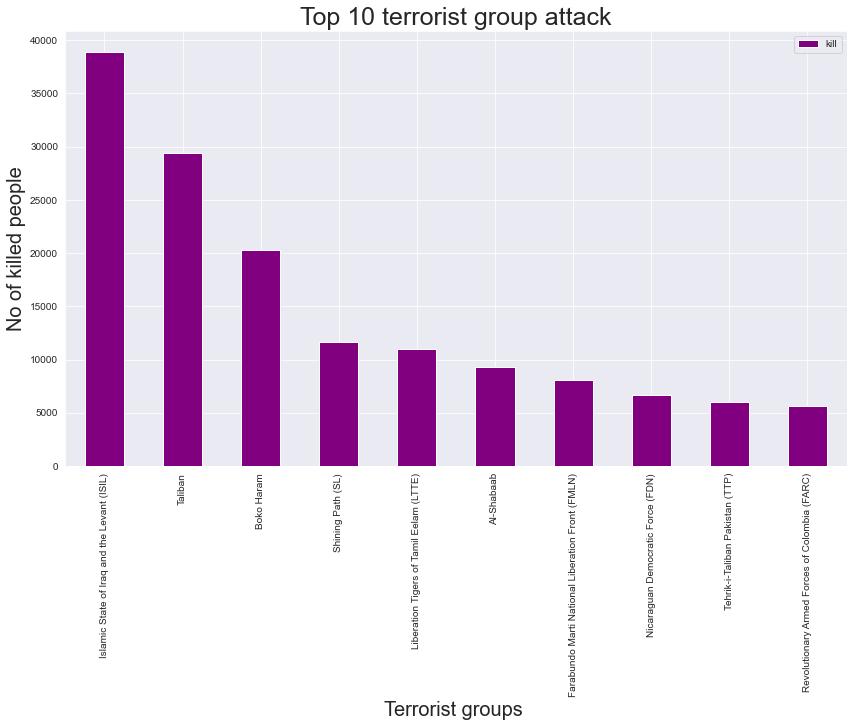

In [21]:
terrorism[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='purple',figsize=(14,8))
plt.title("Top 10 terrorist group attack",fontsize=25)
plt.xlabel("Terrorist groups ",fontsize=20)
plt.ylabel("No of killed people",fontsize=20)
plt.show()

# Conclusions:

### Final Conclusions:-

1. Year with most Attacks : <b>2014</b>
2. Region with most Terrorist Attacks : <b>Middle East & North Africa</b>
3. Country with most Terrorist Attacks : <b>Iraq</b>
4. Groups with most Terrorist Attacks : <b>Taliban</b>
5. City Affected with most Terrorist Attacks : <b>Baghdad</b>
6. Most Weapons used by Terrorist : <b>Bombing/Explosion</b>
7. Most Weapons used to kill : <b>Armed Assault</b>
8. Most Targettypes : <b>Private Citizens & Property</b>
9. AttackTypes with most Wounded : <b>Bombing/Explosion</b>
10. Most Active Terrorist Group : <b>Islamic State of Iraq and the levant(ISIL)</b>

## The End!!!